In [4]:
import numpy as np
import pandas as pd
# The following two modules matplotlib and seaborn are for plots
import matplotlib.pyplot as plt
import seaborn as sns # Comment this if seaborn is not installed
%matplotlib inline
# The module re is for regular expressions
import re

I pulled a data set from Kaggle that inputs a greyscale 48x48 image, and has age, gender, and ethnicity as its output.

In [80]:
df = pd.read_csv('age_gender.csv')
df

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [ ]:
df = pd.read_csv('age_gender.csv')
df

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [6]:
def stringToArray(pixels):
    # this converts the string array into a 48x48 numpy array containing the image
    # needed because the datasets converts the pixel array into string form
    pixels = pixels + " "
    pixelArray = np.array([])
    lenPixels = len(pixels)
    i = 0
    num = ""
    while i < lenPixels:
        if pixels[i] != " ":
            num += pixels[i]
        else:
            pixelArray = np.append(pixelArray, [int(num)])
            num = ""
        i += 1

    imageArray = np.reshape(pixelArray,(48,48))
    return imageArray


In [ ]:
df["pixels"] = df["pixels"].map(stringToArray)
df.head(5)

In [61]:
df["gender"].value_counts()

0    12391
1    11314
Name: gender, dtype: int64

age                                                      25
gender                                                    1
pixels    [[201.0, 227.0, 190.0, 92.0, 54.0, 55.0, 30.0,...
Name: 6000, dtype: object


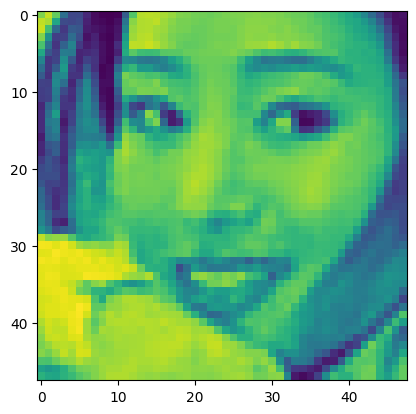

In [55]:
x=6000
print(df.iloc[x])
plt.imshow(df["pixels"][x])
plt.show()


In [8]:
df["pixels"][0]

array([[129., 128., 128., ..., 118.,  99.,  53.],
       [130., 129., 128., ..., 117.,  98.,  52.],
       [131., 129., 130., ..., 114.,  97.,  50.],
       ...,
       [121., 138., 147., ..., 151., 150., 148.],
       [117., 137., 146., ..., 149., 148., 148.],
       [115., 135., 142., ..., 146., 146., 146.]])

Here, I drop the columns img_name and ethnicity because I'm not really using those.

In [9]:
df = df.drop("img_name", axis = 1)
df = df.drop("ethnicity", axis = 1)

In [10]:
df.head()

,age,gender,pixels
0,1,0,"[[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 13..."
1,1,0,"[[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175..."
2,1,0,"[[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79..."
3,1,0,"[[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 20..."
4,1,0,"[[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 21..."


Now we start doing image->gender classifier

In [11]:
from sklearn.model_selection import train_test_split
# default is 75% / 25% train-test split
X = df['pixels'].values
y = df['gender'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)
y_train = np.asarray(y_train).astype(np.float32).reshape(-1,1)
y_valid = np.asarray(y_valid).astype(np.float32).reshape(-1,1)
X_train = X_train.tolist()
X_train = np.asarray(X_train)
X_train = X_train.astype('float32')
X_valid = X_valid.tolist()
X_valid = np.asarray(X_valid)
X_valid = X_valid.astype('float32')



In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

input_shape = (48,48,1)

# Build and train the CNN
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2))) # outputs a matrix with half width and height
model.add(Dropout(0.2)) # Dropout layers prevent overfitting, helping the model generalize

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

2023-01-12 13:26:33.920288: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     


2023-01-12 13:26:38.530859: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
          

In [13]:
batch_size = 32
num_classes = 2
epochs = 10

opt = Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999) # Adam is one good optimizer function; lr is the learning rate

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid, y_valid))
score = model.evaluate(X_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
556/556 [==============================] - 106s 189ms/step - loss: 5.5695 - accuracy: 0.6717 - val_loss: 0.4664 - val_accuracy: 0.8021
Epoch 2/10
556/556 [==============================] - 110s 198ms/step - loss: 0.4533 - accuracy: 0.7839 - val_loss: 0.3553 - val_accuracy: 0.8402
Epoch 3/10
556/556 [==============================] - 106s 191ms/step - loss: 0.3873 - accuracy: 0.8241 - val_loss: 0.3198 - val_accuracy: 0.8595
Epoch 4/10
556/556 [==============================] - 107s 192ms/step - loss: 0.3614 - accuracy: 0.8367 - val_loss: 0.3083 - val_accuracy: 0.8643
Epoch 5/10
556/556 [==============================] - 110s 198ms/step - loss: 0.3311 - accuracy: 0.8524 - val_loss: 0.2964 - val_accuracy: 0.8647
Epoch 6/10
556/556 [==============================] - 103s 186ms/step - loss: 0.3198 - accuracy: 0.8548 - val_loss: 0.2973 - val_accuracy: 0.8650
Epoch 7/10
556/556 [==============================] - 96s 173ms/step - loss: 0.3085 - accuracy: 0.8588 - val_loss: 0.2783 - 

In [ ]:
df = pd.read_csv('age_gender.csv')
df

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


Here we're confirming that using our model to predict items of the original dataset still yields high accuracy (which it should)

In [37]:
X_tst = []
for i in range(23704):
    a = df["pixels"][i]
    a = np.expand_dims(a, axis = 2)
    X_tst.append(a)
X_tst = np.asarray(X_tst)
X_tst = X_tst.astype('float32')
y = model.predict(X_tst)
sub_df = pd.DataFrame(y, columns=['gender'])
sub_df

741/741 [==============================] - 20s 27ms/step


,gender
0,0.483408
1,0.483408
2,0.483408
3,0.483408
4,0.483408
...,...
23699,0.451451
23700,0.595007
23701,0.539927
23702,0.758399


We're using the standard 0.7 threshold to confidentally determine whether the image is a male or female

In [56]:
sub_df['gender'] = sub_df['gender'].apply(lambda x: 1 if x > 0.5 else 0)
sub_df['gender'].value_counts()


0    13551
1    10153
Name: gender, dtype: int64

In [39]:
sub_df.insert(1,"actualGender", df["gender"], True)

In [40]:
sub_df.loc[sub_df["gender"] == sub_df["actualGender"]]

# this proves that in the original dataset, 21373/23407 got accurately classified, which is expected.

,gender,actualGender
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
23692,1,1
23696,0,0
23700,1,1
23701,1,1


This is a walkthrough of using the model to predict my gender :)

In [41]:
from PIL import Image
im = Image.open("greyjeef.jpg", "r")
pix_val = list(im.getdata())

In [42]:
imageArray = np.reshape(pix_val,(48,48))
imageArray


array([[162, 191, 196, ..., 168, 164, 162],
       [160, 186, 192, ..., 165, 166, 163],
       [161, 190, 192, ..., 161, 169, 169],
       ...,
       [ 71,  70,  71, ..., 154,  80,  85],
       [ 59,  60,  58, ..., 151,  80,  86],
       [ 58,  60,  51, ..., 145,  81,  87]])

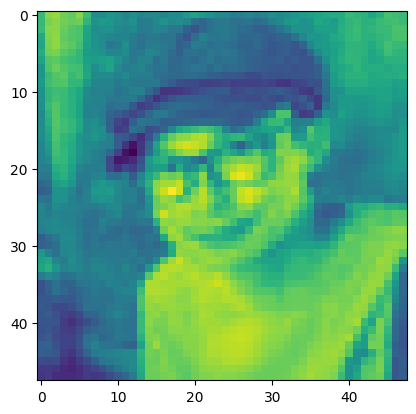

In [43]:
plt.imshow(imageArray)
plt.show()

Here is a function that outputs what the model predicts to be your gender when inputted a 48x48 greyscale image of yourself.

In [65]:
def prediction(image):
    X_tst = []
    a = np.expand_dims(image, axis = 2)
    X_tst.append(a)
    X_tst = np.asarray(X_tst)
    X_tst = X_tst.astype('float32')
    y = model.predict(X_tst)
    print(y[0][0])
    if y[0][0] > 0.5:
        return "female"
    else:
        return "male"

In [66]:
prediction(imageArray)

1/1 [==============================] - 0s 30ms/step
0.55652624


'female'

These are test images using me and my friends' faces :)

1/1 [==============================] - 0s 30ms/step
0.43182877
male


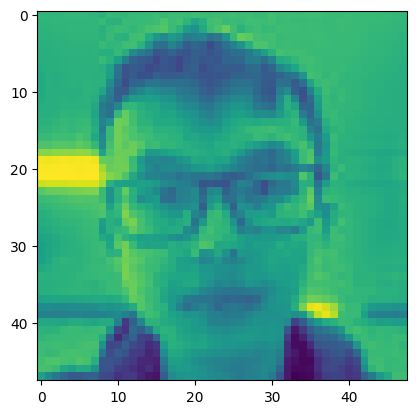

In [67]:
from PIL import Image
im2 = Image.open("MALE.jpg", "r")
pix_val = list(im2.getdata())
imageArray = np.reshape(pix_val,(48,48))
print(prediction(imageArray))
plt.imshow(imageArray)
plt.show()


1/1 [==============================] - 0s 41ms/step
0.1070607
male


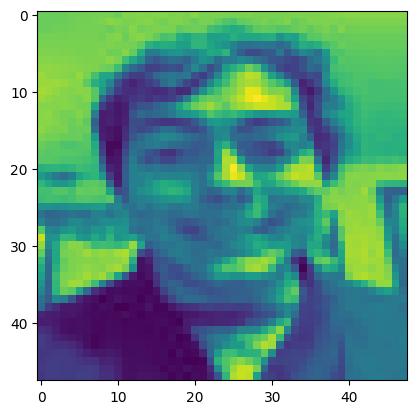

In [68]:
from PIL import Image
im2 = Image.open("david2.jpg", "r")
pix_val = list(im2.getdata())
imageArray = np.reshape(pix_val,(48,48))
print(prediction(imageArray))
plt.imshow(imageArray)
plt.show()

1/1 [==============================] - 0s 34ms/step
0.55652624
female


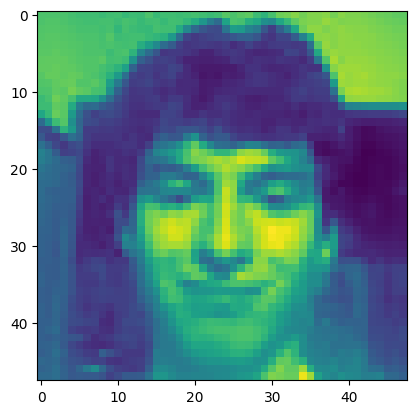

In [69]:
from PIL import Image
im2 = Image.open("ket.jpg", "r")
pix_val = list(im2.getdata())
imageArray = np.reshape(pix_val,(48,48))
print(prediction(imageArray))
plt.imshow(imageArray)
plt.show()


1/1 [==============================] - 0s 33ms/step
0.90178275
female


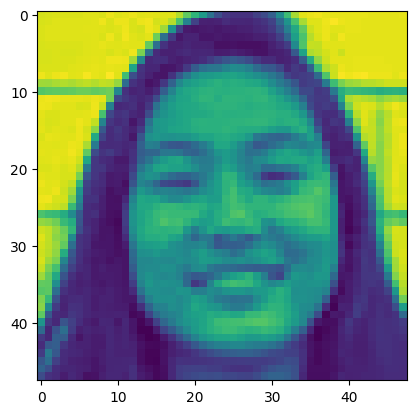

In [70]:
from PIL import Image
im2 = Image.open("lilian.jpg", "r")
pix_val = list(im2.getdata())
imageArray = np.reshape(pix_val,(48,48))
print(prediction(imageArray))
plt.imshow(imageArray)
plt.show()


1/1 [==============================] - 0s 27ms/step
0.3716015
male


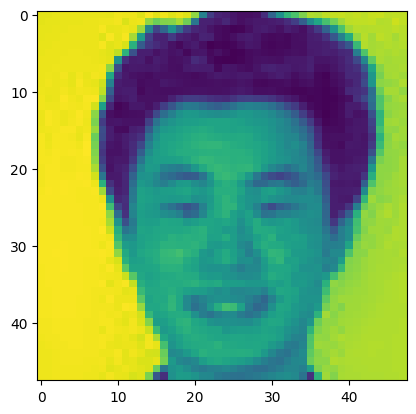

In [71]:
from PIL import Image
im2 = Image.open("richard.jpg", "r")
pix_val = list(im2.getdata())
imageArray = np.reshape(pix_val,(48,48))
print(prediction(imageArray))
plt.imshow(imageArray)
plt.show()


1/1 [==============================] - 0s 29ms/step
0.17750968
male


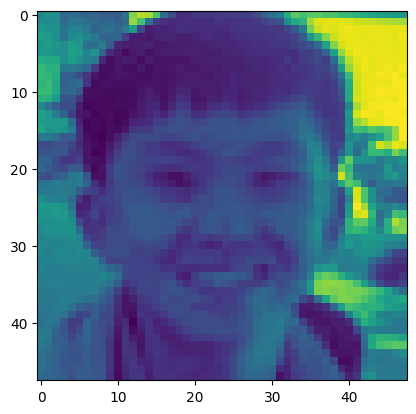

In [72]:
from PIL import Image
im2 = Image.open("richardslilbro.jpg", "r")
pix_val = list(im2.getdata())
imageArray = np.reshape(pix_val,(48,48))
print(prediction(imageArray))
plt.imshow(imageArray)
plt.show()


1/1 [==============================] - 0s 30ms/step
0.83928144
female


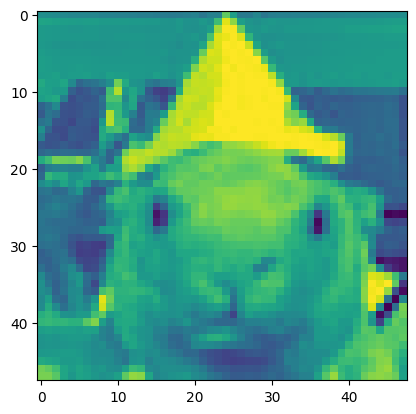

In [73]:
from PIL import Image
im2 = Image.open("plush.jpg", "r")
pix_val = list(im2.getdata())
imageArray = np.reshape(pix_val,(48,48))
print(prediction(imageArray))
plt.imshow(imageArray)
plt.show()


1/1 [==============================] - 0s 33ms/step
0.21634498
male


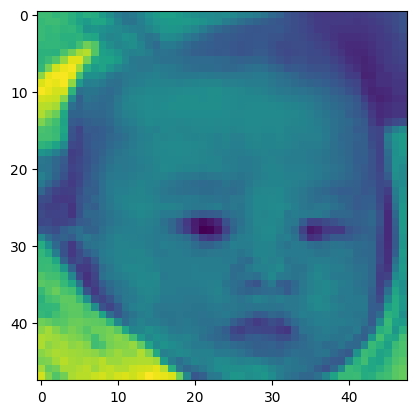

In [74]:
from PIL import Image
im2 = Image.open("richardbaby.jpg", "r")
pix_val = list(im2.getdata())
imageArray = np.reshape(pix_val,(48,48))
print(prediction(imageArray))
plt.imshow(imageArray)
plt.show()


1/1 [==============================] - 0s 40ms/step
0.5106591
female


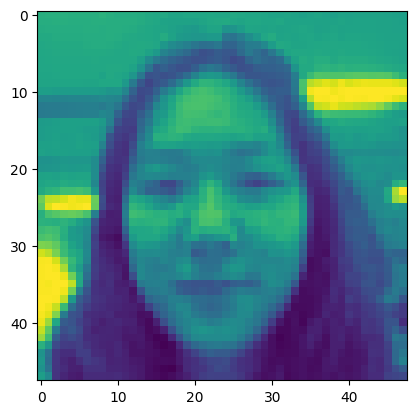

In [79]:
from PIL import Image
im2 = Image.open("shera.jpg", "r")
pix_val = list(im2.getdata())
imageArray = np.reshape(pix_val,(48,48))
print(prediction(imageArray))
plt.imshow(imageArray)
plt.show()


1/1 [==============================] - 0s 159ms/step
0.8980597
female


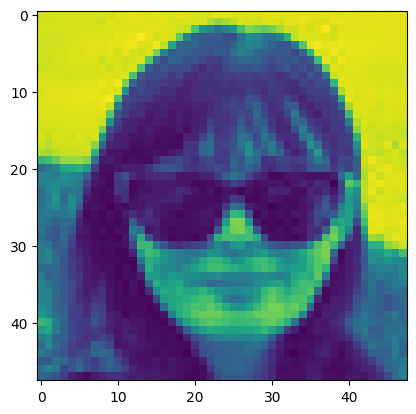

In [83]:
from PIL import Image
im2 = Image.open("mama.jpg", "r")
pix_val = list(im2.getdata())
imageArray = np.reshape(pix_val,(48,48))
print(prediction(imageArray))
plt.imshow(imageArray)
plt.show()


1/1 [==============================] - 0s 61ms/step
0.4974576
male


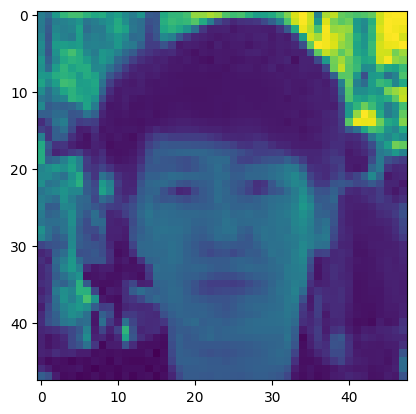

In [84]:
from PIL import Image
im2 = Image.open("derekmom.jpg", "r")
pix_val = list(im2.getdata())
imageArray = np.reshape(pix_val,(48,48))
print(prediction(imageArray))
plt.imshow(imageArray)
plt.show()


1/1 [==============================] - 0s 263ms/step
0.6837269
female


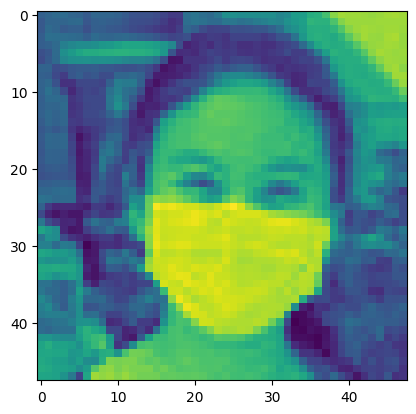

In [85]:
from PIL import Image
im2 = Image.open("ally.jpg", "r")
pix_val = list(im2.getdata())
imageArray = np.reshape(pix_val,(48,48))
print(prediction(imageArray))
plt.imshow(imageArray)
plt.show()
